In [1]:
%load_ext autoreload

In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import scipy
import datetime

## Load WRF data

In [3]:
wname = 'wrf27vmixing.csv'
wrf = pd.read_csv(wname,parse_dates=['date'])
wrf.sort_values('date', inplace=True)
# convert to local time
wrf['local'] = wrf['date'] - datetime.timedelta(hours=4)

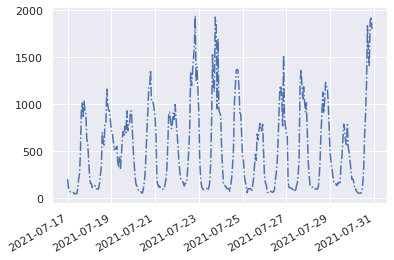

In [4]:
sns.set()
plt.plot(wrf.date.values, wrf.MixHgt.values,'-.')
fig = plt.gcf()
fig.autofmt_xdate()
plt.show()

## Load LiDAR data

In [31]:
import xarray as xr
test = xr.open_dataset(path_day + file)

In [32]:
print(file)
test.sweep_group_name

WLS200s-94_2021-07-19_23-55-23_fixed_24_100m.nc


<xarray.DataArray 'sweep_group_name' (sweep: 1)>
array(['Sweep_317109'], dtype=object)
Coordinates:
  * sweep    (sweep) int32 1
Attributes:
    comments:  Array of names of each sweep group in file.

In [ ]:
path_day = "../FXD20210719/"
time_day = np.array([])
cnr_day = np.array([])
relat_beta_day = np.array([])
spectral_width_day = np.array([])
atm_structures = np.array([])
ver_wind_speed = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        print('type data', type(data))
        #gets the name of the group that contains the data as it changes in every file
        sweep_file = data[list(data.groups.keys())[1]]
        print('type sweep', type(sweep_file))
        print(sweep_file)
        print('-------------------------')
        
        #THE [:] IS NEEDED TO GET ALL THE VALUES
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        dumm_rela_beta = sweep_file.variables["relative_beta"][:]
        dumm_spectral = sweep_file.variables["doppler_spectrum_width"][:]
        dum_struct = sweep_file.variables["atmospherical_structures_type"][:]
        dumm_wind = sweep_file.variables["radial_wind_speed"][:]
        #appending all the values into one numpy array
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)
        relat_beta_day= np.append(relat_beta_day, dumm_rela_beta)
        spectral_width_day = np.append(spectral_width_day, dumm_spectral)
        atm_structures  = np.append(atm_structures, dum_struct)
        ver_wind_speed = np.append(ver_wind_speed, dumm_wind)
#converts time from epoch to current local time
time =(pd.to_datetime(time_day, unit = 's'))
columns = (np.array([i for i in range(200, 5200, 100)])).astype(str)
#tranforming the arrays into a dataframe
df_cnr = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))

#df_beta = pd.DataFrame(np.flip((relat_beta_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))
#df_spectralWidth = pd.DataFrame(np.flip((spectral_width_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_313374:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

<ipython-input-38-d837f8179373>:16: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(sweep_file)
<ipython-input-38-d837f8179373>:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dumm_cnr = sweep_file.variables['cnr'][:]
<ipython-input-38-d837f8179373>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dumm_time= sweep_fi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_313413:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_313491:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_313595:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_313699:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_313790:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_313881:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_313972:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314089:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314180:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314284:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314375:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314453:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314544:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314635:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314739:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314817:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_314921:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315012:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315092:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315170:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315261:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315339:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315417:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315534:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315612:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315690:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315768:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315846:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_315924:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316002:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316106:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316197:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316288:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316379:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316457:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316535:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316613:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316691:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316769:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316860:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_316938:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

type data <class 'netCDF4._netCDF4.Dataset'>
type sweep <class 'netCDF4._netCDF4.Group'>
<class 'netCDF4._netCDF4.Group'>
group /Sweep_317005:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time,range), int32 gate_index(range), float64 radial_wind_speed(time,range), float64 radial_wind_speed_ci(time,range), uint8 radi

In [ ]:
type(data)

Selects the PBL values calculated by the LiDAR

In [ ]:
df_structures = pd.DataFrame(np.flip((atm_structures )).reshape(int(len(atm_structures)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))
df_structures.head()

Creates a copy of teh CNR data frame

## Following Angevine 1993

"The peak SNR of each sample is found and then the median of the heights at which the peaks occur over some period is computed"

"Alternatively the order can be reverwed, taking the median of the SNR profiles first and then finding the height at which each peak occurs"


<class 'numpy.int64'>


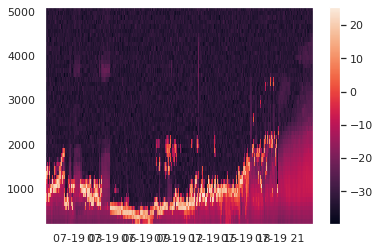

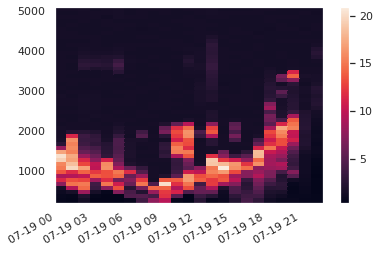

NameError: name 'plot_pbl' is not defined

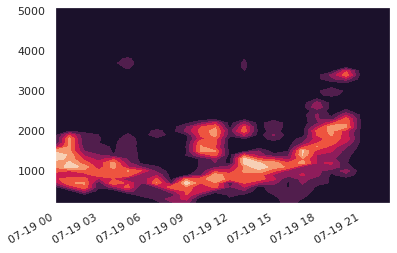

In [36]:
# not quite following angevine since looking at median or mean of the CNR
# not median, mean of the heights.

pcnr = df_cnr.transpose()
pcnr.index = pcnr.index.astype(int)
print(type(pcnr.index[0]))
cb = plt.pcolormesh(pcnr.columns, pcnr.index.values,pcnr.values)
plt.colorbar()
plt.show()
# take rolling mean over 3 heights
test = pcnr.rolling(1).median()
# take 1h average
test = test.resample('1H',axis=1).std()
cb = plt.pcolormesh(test.columns, test.index.values,test)
plt.colorbar(cb)
fig = plt.gcf()
fig.autofmt_xdate()
plt.show()
plt.contourf(test.columns, test.index.values,test)
fig = plt.gcf()
fig.autofmt_xdate()
tval,pbl = get_pbl(test.transpose())
plot_pbl(tval,pbl,'test')
plt.show()
# Then find height at which maximum CNR value occurs



In [ ]:
plt.contourf(pcnr.columns, pcnr.index.values,pcnr.values)
tval,pbl = get_pbl(test.transpose())
plot_pbl(tval,pbl,'test')

d1 = datetime.datetime(2021,7,19)
d2 = datetime.datetime(2021,7,20)
wrf2 = wrf[wrf['date']>=d1]
wrf2 = wrf2[wrf2['date']<=d2]
plt.plot(wrf2.date.values,wrf2.MixHgt.values,'-g', label='wrf')
plt.legend() 
fig = plt.gcf()
#d1 = datetime.datetime(2021,7,19)
#d2 = datetime.datetime(2021,7,20,12)

plt.show()

## Using standard deviation

In [143]:
# get standard deviation over an hour
df_std = df_cnr.resample('1H').std()
df_std2= df_cnr.rolling('1H').std()
df_mean = df_cnr.resample('1H').mean()

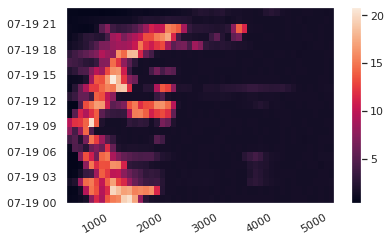

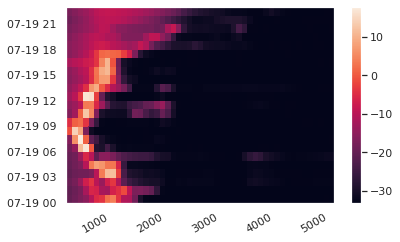

In [147]:
# y axis is time and x axis is height.
# standard deviation of CNR over 1h
xval = [int(x) for x in df_std.columns]
cb = plt.pcolormesh(xval,df_std.index,df_std)
plt.colorbar(cb)
fig = plt.gcf()
fig.autofmt_xdate()
plt.show()
xval = [int(x) for x in df_mean.columns]
cb = plt.pcolormesh(xval,df_mean.index,df_mean)
plt.colorbar(cb)
fig = plt.gcf()
fig.autofmt_xdate()

In [16]:
## go through each row.
## each row becomes a series. 

def get_pbl(df_std):
    rval = []
    tval = []
    pbl = []
    stdra = []
    for xval in df_std.iterrows(): 
        time = xval[0]
        temp = xval[1]
        # argmax returns index of place in series with largest value
        maxindex = temp.argmax()
        # get index value (height) of place of largest value
        
        pblht = int(temp.index[maxindex])
        #std = temp[maxindex]
        rval.append((time,pblht))
        pbl.append(pblht)
        tval.append(time)
        #stdra.append(std)
    return tval,pbl

In [17]:
test.transpose()

,5100,5000,4900,4800,4700,4600,4500,4400,4300,4200,...,1100,1000,900,800,700,600,500,400,300,200
2021-07-19 00:00:00,1.509589,1.460205,1.510010,1.507158,1.482492,1.509635,1.521768,1.557244,1.476305,1.483388,...,15.176132,13.602090,9.095275,11.456254,7.551852,1.638069,1.066806,0.840376,0.753872,0.701313
2021-07-19 01:00:00,1.511393,1.470897,1.548378,1.490823,1.575382,1.502351,1.514805,1.550193,1.460266,1.544972,...,19.731296,11.723904,9.503248,13.309827,14.876480,9.453065,1.634914,0.666557,0.551071,0.522401
2021-07-19 02:00:00,1.666474,1.542871,1.560356,1.523212,1.487482,1.491648,1.491146,1.542160,1.504092,1.549157,...,16.992602,14.112591,10.121723,12.896419,15.195426,14.552101,8.352056,2.082634,1.480460,1.253267
2021-07-19 03:00:00,1.460962,1.527962,1.522566,1.487836,1.461951,1.507512,1.488042,1.530764,1.521737,1.561618,...,9.959698,12.342624,13.968056,8.616932,3.837241,3.494873,1.589952,0.699871,0.496376,0.464902
2021-07-19 04:00:00,1.564285,1.512087,1.419268,1.509273,1.546711,1.493912,1.523514,1.504102,1.482784,1.472048,...,16.209522,13.289195,13.374966,11.710391,14.983990,7.656226,0.727065,0.520416,0.478007,0.488224
2021-07-19 05:00:00,1.611191,1.609682,1.620638,1.476775,1.507785,1.552053,1.477379,1.493113,1.463325,1.574144,...,9.089349,15.069277,14.253940,6.359542,10.838082,13.338422,7.247238,0.524341,0.386707,0.398936
2021-07-19 06:00:00,1.485870,1.461503,1.512841,1.480800,1.510379,1.490256,1.499888,1.474163,1.460582,1.542099,...,5.760673,11.722545,5.799733,7.075112,5.864048,2.609786,4.249754,4.661353,0.710512,0.516208
2021-07-19 07:00:00,1.518670,1.520483,1.540453,1.482400,1.489903,1.425105,1.499654,1.528187,1.484469,1.534181,...,3.173746,4.850911,8.335402,12.502691,15.001141,6.480008,2.289985,4.858723,3.783875,1.944542
2021-07-19 08:00:00,1.545037,1.486956,1.499183,1.475798,1.537248,1.452756,1.437336,1.537290,1.503110,1.525716,...,1.524071,1.552702,1.550404,1.477787,4.619913,14.399103,8.136417,4.097354,7.689017,5.392980
2021-07-19 09:00:00,1.521885,1.524739,1.478332,1.477221,1.503489,1.522759,1.481115,1.486157,1.587711,1.541558,...,1.468538,1.497277,2.144483,13.819584,20.188788,14.226396,12.373709,12.016166,9.745866,7.074040


In [22]:
tval,pbl = get_pbl(df_std)
def plot_pbl(tval,pbl,label):
    plt.plot(tval,pbl,label=label)

tval,pbl = get_pbl(df_std)
plot_pbl(tval,pbl,'std')
tval,pbl = get_pbl(df_std2)
plot_pbl(tval,pbl,'std2')
tval,pbl = get_pbl(df_mean)
plot_pbl(tval,pbl,'mean')
tval,pbl = get_pbl(test.transpose())
plot_pbl(tval,pbl,'test')

plt.plot(wrf.date.values,wrf.MixHgt.values,label='wrf')
plt.legend() 
fig = plt.gcf()
d1 = datetime.datetime(2021,7,19)
d2 = datetime.datetime(2021,7,20,12)
ax = plt.gca()
ax.set_xlim(d1,d2)
ax.set_ylim(0,4000)
fig.autofmt_xdate()
plt.show()

NameError: name 'df_std' is not defined

In [23]:
df_cnr_cop = df_cnr.reset_index(level=0,col_fill='date')
lh = list(df_cnr_cop.columns)
lh[0] = 'date'
print(lh)

['date', '5100', '5000', '4900', '4800', '4700', '4600', '4500', '4400', '4300', '4200', '4100', '4000', '3900', '3800', '3700', '3600', '3500', '3400', '3300', '3200', '3100', '3000', '2900', '2800', '2700', '2600', '2500', '2400', '2300', '2200', '2100', '2000', '1900', '1800', '1700', '1600', '1500', '1400', '1300', '1200', '1100', '1000', '900', '800', '700', '600', '500', '400', '300', '200']


In [61]:
df_cnr_cop.columns = lh
df_cnr_cop

,date,5100,5000,4900,4800,4700,4600,4500,4400,4300,...,1100,1000,900,800,700,600,500,400,300,200
0,2021-07-19 23:57:23,-34.26,-32.40,-32.97,-33.62,-33.00,-33.04,-29.28,-27.45,-26.54,...,-7.06,-7.63,-8.65,-10.17,-12.15,-13.34,-14.95,-16.30,-17.09,-18.14
1,2021-07-19 23:57:22,-32.32,-31.06,-33.73,-32.19,-35.84,-32.39,-27.91,-26.88,-26.40,...,-7.18,-7.89,-8.88,-10.47,-12.34,-13.57,-14.97,-16.25,-17.02,-17.93
2,2021-07-19 23:57:21,-32.46,-32.01,-33.66,-32.45,-31.80,-34.17,-28.96,-27.92,-25.63,...,-7.08,-7.79,-8.87,-10.29,-12.20,-13.56,-14.90,-16.28,-17.14,-17.98
3,2021-07-19 23:57:20,-34.17,-32.98,-32.31,-32.31,-30.78,-34.91,-30.43,-27.41,-27.04,...,-7.16,-7.85,-8.82,-10.21,-12.23,-13.50,-15.00,-16.17,-16.99,-17.90
4,2021-07-19 23:57:19,-33.57,-31.98,-32.05,-33.71,-30.37,-34.42,-28.87,-26.96,-27.10,...,-7.18,-7.88,-8.88,-10.35,-12.24,-13.41,-14.92,-16.08,-16.97,-17.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34636,2021-07-19 00:00:24,-29.87,-31.79,-32.57,-32.39,-33.47,-33.71,-34.68,-33.04,-32.65,...,18.42,-3.26,-7.29,-9.14,-11.44,-14.69,-16.79,-17.96,-19.19,-20.27
34637,2021-07-19 00:00:23,-30.62,-32.02,-31.94,-32.81,-33.31,-33.02,-29.34,-35.11,-32.08,...,18.11,-3.07,-7.37,-9.35,-11.44,-14.69,-16.74,-17.81,-19.20,-20.38
34638,2021-07-19 00:00:22,-33.49,-33.35,-31.20,-32.94,-34.57,-31.86,-31.53,-32.46,-33.79,...,18.24,-3.73,-7.53,-9.47,-11.42,-14.65,-16.76,-17.66,-19.23,-20.27
34639,2021-07-19 00:00:21,-33.37,-32.89,-30.80,-29.37,-30.53,-33.50,-32.13,-35.91,-32.42,...,18.20,-4.36,-7.57,-9.27,-11.25,-14.58,-16.62,-17.87,-19.14,-20.12


In [63]:
type(df_cnr_cop.date[0])

pandas._libs.tslibs.timestamps.Timestamp

Calculates the PBL Height based on the maximum of the variance from the CNR per hour

In [ ]:
For each height, take the values over an hour, and look at standard deviation of CNR values.


In [11]:
def resample(df):
    std_dict = {}
    i =  0

    for heigth in df.columns[1:]:
       
        
        if df['index'][i].date() ==  pd.Timestamp("2021-07-19"):
            std_series = df.resample("H", on='index').std()
            if i ==0:
                std_dict['time'] = np.array(std_series.index)
            i +=1
            std_dict[heigth] = []
            for std in std_series:
                std_dict[heigth].append(std)
       
        
        else: 
            i+=1
    return std_series

In [24]:
def pbl_heigth(df):
    std_dict = {}
    i =  0

    for heigth in df.columns[1:]:
       
        
        if df['index'][i].date() ==  pd.Timestamp("2021-07-19"):
            std_series = df.resample("H", on='index')[heigth].std()
            if i ==0:
                std_dict['time'] = np.array(std_series.index)
            i +=1
            std_dict[heigth] = []
            for std in std_series:
                std_dict[heigth].append(std)
       
        
        else: 
            i+=1
        
        
    height_= 0
    
    stdMax = (std_dict['200'][0])
    pbl_h = []
    for k in range(len(std_dict['5100'])):
        for h in std_dict.keys():
            if h != 'time':
    
                current_std = std_dict[h][k]

                if current_std > stdMax:
                    height_ = h
        pbl_h.append(height_)

    std_dict['PBL_H_CNR'] = pbl_h
    
    return pd.DataFrame(std_dict)

In [25]:
type(df_cnr_copy.index)

NameError: name 'df_cnr_copy' is not defined

In [26]:
pblh = pbl_heigth(df_cnr_cop)
pblh['PBL_H_CNR']= pblh['PBL_H_CNR'].astype(int)
pblh.head()

,time,5100,5000,4900,4800,4700,4600,4500,4400,4300,...,1000,900,800,700,600,500,400,300,200,PBL_H_CNR
0,2021-07-19 00:00:00,1.509589,1.460205,1.510010,1.507158,1.482492,1.509635,1.521768,1.557244,1.476305,...,13.602090,9.095275,11.456254,7.551852,1.638069,1.066806,0.840376,0.753872,0.701313,300
1,2021-07-19 01:00:00,1.511393,1.470897,1.548378,1.490823,1.575382,1.502351,1.514805,1.550193,1.460266,...,11.723904,9.503248,13.309827,14.876480,9.453065,1.634914,0.666557,0.551071,0.522401,500
2,2021-07-19 02:00:00,1.666474,1.542871,1.560356,1.523212,1.487482,1.491648,1.491146,1.542160,1.504092,...,14.112591,10.121723,12.896419,15.195426,14.552101,8.352056,2.082634,1.480460,1.253267,200
3,2021-07-19 03:00:00,1.460962,1.527962,1.522566,1.487836,1.461951,1.507512,1.488042,1.530764,1.521737,...,12.342624,13.968056,8.616932,3.837241,3.494873,1.589952,0.699871,0.496376,0.464902,500
4,2021-07-19 04:00:00,1.564285,1.512087,1.419268,1.509273,1.546711,1.493912,1.523514,1.504102,1.482784,...,13.289195,13.374966,11.710391,14.983990,7.656226,0.727065,0.520416,0.478007,0.488224,500


The height per hour

In [27]:
print(pblh[["time", "PBL_H_CNR"]])

                  time  PBL_H_CNR
0  2021-07-19 00:00:00        300
1  2021-07-19 01:00:00        500
2  2021-07-19 02:00:00        200
3  2021-07-19 03:00:00        500
4  2021-07-19 04:00:00        500
5  2021-07-19 05:00:00        500
6  2021-07-19 06:00:00        300
7  2021-07-19 07:00:00        200
8  2021-07-19 08:00:00        200
9  2021-07-19 09:00:00        200
10 2021-07-19 10:00:00        400
11 2021-07-19 11:00:00        500
12 2021-07-19 12:00:00        200
13 2021-07-19 13:00:00        300
14 2021-07-19 14:00:00        200
15 2021-07-19 15:00:00        200
16 2021-07-19 16:00:00        200
17 2021-07-19 17:00:00        200
18 2021-07-19 18:00:00        200
19 2021-07-19 19:00:00        200
20 2021-07-19 20:00:00        200
21 2021-07-19 21:00:00        200
22 2021-07-19 22:00:00       1300
23 2021-07-19 23:00:00       1700


In [28]:
pblh['PBL_H_CNR'] = pblh['PBL_H_CNR'].replace([1300, 1700], pblh['PBL_H_CNR'].mean())
print(pblh[["time", "PBL_H_CNR"]])

                  time   PBL_H_CNR
0  2021-07-19 00:00:00  300.000000
1  2021-07-19 01:00:00  500.000000
2  2021-07-19 02:00:00  200.000000
3  2021-07-19 03:00:00  500.000000
4  2021-07-19 04:00:00  500.000000
5  2021-07-19 05:00:00  500.000000
6  2021-07-19 06:00:00  300.000000
7  2021-07-19 07:00:00  200.000000
8  2021-07-19 08:00:00  200.000000
9  2021-07-19 09:00:00  200.000000
10 2021-07-19 10:00:00  400.000000
11 2021-07-19 11:00:00  500.000000
12 2021-07-19 12:00:00  200.000000
13 2021-07-19 13:00:00  300.000000
14 2021-07-19 14:00:00  200.000000
15 2021-07-19 15:00:00  200.000000
16 2021-07-19 16:00:00  200.000000
17 2021-07-19 17:00:00  200.000000
18 2021-07-19 18:00:00  200.000000
19 2021-07-19 19:00:00  200.000000
20 2021-07-19 20:00:00  200.000000
21 2021-07-19 21:00:00  200.000000
22 2021-07-19 22:00:00  391.666667
23 2021-07-19 23:00:00  391.666667


In [29]:
lidar_pbl = df_structures[df_structures==30]


Mean of the PBL calculated bythe LiDAR

In [32]:
def pbl_lidar(df):
    h = []
    time= []
    for i in range(len(df)):
        for column in df.columns:
            if df[column][i]==30:
                h.append(column)
                time.append(df.index[i])
    return h, time

In [33]:
h_lidar, time_lidar = pbl_lidar(lidar_pbl)

In [34]:
data = {'time': time_lidar, 'Heigth': [int(i) for i in h_lidar]}
df_pbl_li = pd.DataFrame(data = data)
df_pbl_li.head()

,time,Heigth
0,2021-07-19 23:52:22,500
1,2021-07-19 23:52:22,400
2,2021-07-19 23:52:22,300
3,2021-07-19 23:52:22,200
4,2021-07-19 23:52:21,500


In [35]:
std_pbl_li_H = df_pbl_li.resample("H", on='time')['Heigth'].mean().round()
std_pbl_li_H

time
2021-07-19 00:00:00    336.0
2021-07-19 01:00:00    374.0
2021-07-19 02:00:00    311.0
2021-07-19 03:00:00    300.0
2021-07-19 04:00:00    300.0
2021-07-19 05:00:00    285.0
2021-07-19 06:00:00    210.0
2021-07-19 07:00:00    200.0
2021-07-19 08:00:00    200.0
2021-07-19 09:00:00    245.0
2021-07-19 10:00:00    282.0
2021-07-19 11:00:00    388.0
2021-07-19 12:00:00    248.0
2021-07-19 13:00:00    338.0
2021-07-19 14:00:00    362.0
2021-07-19 15:00:00    347.0
2021-07-19 16:00:00    299.0
2021-07-19 17:00:00    468.0
2021-07-19 18:00:00    472.0
2021-07-19 19:00:00    446.0
2021-07-19 20:00:00    645.0
2021-07-19 21:00:00    242.0
2021-07-19 22:00:00    375.0
2021-07-19 23:00:00    296.0
Freq: H, Name: Heigth, dtype: float64

In [36]:
print(pblh[["time", "PBL_H_CNR"]])

                  time   PBL_H_CNR
0  2021-07-19 00:00:00  300.000000
1  2021-07-19 01:00:00  500.000000
2  2021-07-19 02:00:00  200.000000
3  2021-07-19 03:00:00  500.000000
4  2021-07-19 04:00:00  500.000000
5  2021-07-19 05:00:00  500.000000
6  2021-07-19 06:00:00  300.000000
7  2021-07-19 07:00:00  200.000000
8  2021-07-19 08:00:00  200.000000
9  2021-07-19 09:00:00  200.000000
10 2021-07-19 10:00:00  400.000000
11 2021-07-19 11:00:00  500.000000
12 2021-07-19 12:00:00  200.000000
13 2021-07-19 13:00:00  300.000000
14 2021-07-19 14:00:00  200.000000
15 2021-07-19 15:00:00  200.000000
16 2021-07-19 16:00:00  200.000000
17 2021-07-19 17:00:00  200.000000
18 2021-07-19 18:00:00  200.000000
19 2021-07-19 19:00:00  200.000000
20 2021-07-19 20:00:00  200.000000
21 2021-07-19 21:00:00  200.000000
22 2021-07-19 22:00:00  391.666667
23 2021-07-19 23:00:00  391.666667


In [30]:
sns.set()
plt.plot(std_pbl_li_H, label = "LiDAR Values")
plt.plot(pblh["time"],pblh['PBL_H_CNR'], label = "CNR derived Values")
plt.title("PBL Calculations on July 19, 2021")
plt.ylabel("Heigth (m)")
plt.xlabel("Time (EDT)")
plt.plot(wrf.local, wrf.MixHgt, label = 'wrf')
plt.legend()
fig = plt.gcf()
d1 = datetime.datetime(2021,7,19)
d2 = datetime.datetime(2021,7,20)
ax = plt.gca()
ax.set_xlim(d1,d2)
ax.set_ylim(0,1000)
fig.autofmt_xdate()
plt.show()

NameError: name 'std_pbl_li_H' is not defined

Many over and under stimations the code logic need review

In [71]:
wname = 'wrf27vmixing.csv'
wrf = pd.read_csv(wname,parse_dates=['date'])
wrf.sort_values('date', inplace=True)
# convert to local time
wrf['local'] = wrf['date'] - datetime.timedelta(hours=4)

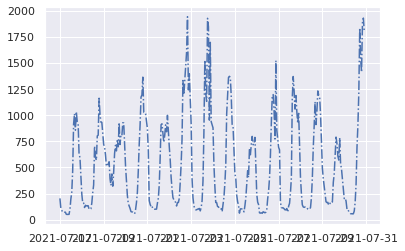

In [62]:
plt.plot(wrf.date.values, wrf.MixHgt.values,'-.')
plt.show()

In [51]:
wrf.date.values

array(['2021-07-17 00:00:00', '2021-07-17 01:00:00',
       '2021-07-17 02:00:00', '2021-07-17 03:00:00',
       '2021-07-17 04:00:00', '2021-07-17 05:00:00',
       '2021-07-17 06:00:00', '2021-07-17 07:00:00',
       '2021-07-17 08:00:00', '2021-07-17 09:00:00',
       '2021-07-17 10:00:00', '2021-07-17 11:00:00',
       '2021-07-17 12:00:00', '2021-07-17 13:00:00',
       '2021-07-17 14:00:00', '2021-07-17 15:00:00',
       '2021-07-17 16:00:00', '2021-07-17 17:00:00',
       '2021-07-17 18:00:00', '2021-07-17 19:00:00',
       '2021-07-17 20:00:00', '2021-07-17 21:00:00',
       '2021-07-17 22:00:00', '2021-07-18 00:00:00',
       '2021-07-18 01:00:00', '2021-07-18 02:00:00',
       '2021-07-18 03:00:00', '2021-07-18 04:00:00',
       '2021-07-18 05:00:00', '2021-07-18 06:00:00',
       '2021-07-18 07:00:00', '2021-07-18 08:00:00',
       '2021-07-18 09:00:00', '2021-07-18 10:00:00',
       '2021-07-18 11:00:00', '2021-07-18 12:00:00',
       '2021-07-18 13:00:00', '2021-07-18 14:0

In [223]:
from src import PBL_functions as pblf

ModuleNotFoundError: No module named 'src'

In [ ]:
pblf.pbl_height()

In [236]:
import sys
for p in sys.path:
    print(p)

/hysplit-users/alicec/projects/nerto2022/NOAA_PBLH
/hysplit-users/alicec/projects/nerto2022/NOAA_PBLH
/hysplit-users/alicec/projects/nerto2022/NOAA_PBLH/Notebooks
/hysplit-users/alicec/anaconda3/bin
/hysplit-users/alicec/utilhysplit
/pub/ECMWF/alicec/monetio
/pub/ECMWF/alicec/monet
/hysplit-users/alicec/anaconda3/envs/paris/lib/python38.zip
/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8
/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/lib-dynload

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages
/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/PyNIO
/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/IPython/extensions
/hysplit-users/alicec/.ipython


In [237]:
import os
newpath = os.path.abspath('..')

In [234]:
#sys.path.insert(0,newpath)

In [246]:
from source import PBLH_Functions as pblf

In [37]:
%autoreload
pblf.pbl_heigth()

NameError: name 'pblf' is not defined